In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import uniform

In [2]:
fpath = Path("/home/micah/Documents/machine_learning/project2")
fdata = fpath / "UTK-peers.csv"

In [3]:
data =  pd.read_csv(fdata)

In [4]:
names =  list(data)

In [5]:
del names[4]
del names[2]
del names[1]
del names[0]

In [6]:
matrix = data.to_numpy()

In [7]:
colleges = matrix[:,1]
ipeds = matrix[:,2]
delete = np.arange(57, 187)
colleges = np.delete(colleges, delete)
ipeds = np.delete(ipeds, delete)
ipeds = np.vstack(ipeds).astype(np.float)

##### delete the first 3 columns of data, since these are just order number, name, and id number

In [8]:
matrix = np.delete(matrix, [0,1,2], axis = 1)

##### trim off the 'nan' entries that go from row 58 to the last row

In [9]:
del_rows = np.arange(57,187)
matrix = np.delete(matrix, del_rows, axis = 0)

#### **Need to convert strings to numeric quantities**

##### for the 'HBC' column, this can actually be removed entirely, since the entry for every school is 'No', thus it is not a relevant metric to differentiate these schools.

In [10]:
matrix = np.delete(matrix, 1, axis = 1)

##### strip all spaces at beggining and end of string entries

In [11]:
for i in range(len(matrix[:,0])):
    for j in range(len(matrix[0,:])):
        if type(matrix[i,j]) == str:
            matrix[i,j] = matrix[i,j].strip()

##### for the med school and vet school columns, let 0 mean the college does not have one, 1 means 'pre clin' only, and 2 means they do have one

In [12]:
for i in range(57):
    if matrix[i,4] == 'pre clin':
        matrix[i,4] = 1
    if matrix[i,4] == 'x':
        matrix[i,4] = 2
    if matrix[i,5] == 'x':
        matrix[i,5] = 2

##### remove all commas and dollar signs from the strings with monetary values

In [13]:
for i in range(len(matrix[:,0])):
    for j in range(len(matrix[0,:])):
        if type(matrix[i,j]) == str:
            matrix[i,j] = matrix[i,j].replace(',','')
            matrix[i,j] = matrix[i,j].replace('$','')

##### any entry of '-' should be changed to nan

In [14]:
for i in range(len(matrix[:,0])):
    for j in range(len(matrix[0,:])):
        if matrix[i,j] == '-':
            matrix[i,j] = np.nan

In [15]:
for i in range(len(matrix[:,0])):
    for j in range(len(matrix[0,:])):
        matrix[i,j] = float(matrix[i,j])

In [16]:
matrix = np.vstack(matrix).astype(np.float)

##### now, find all remaning nan entries, and decide what to do with those values

In [17]:
temp = np.zeros(150)

In [18]:
k=0
for i in range(len(matrix[:,0])):
    for j in range(len(matrix[0,:])):
        if np.isnan(matrix[i,j]) == True:
            temp[k] = j
            k += 1

In [19]:
temp.sort()
temp

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5., 22., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 32., 34., 34., 34., 34., 34., 34., 34., 34., 34., 34.,
       34., 34., 34., 34., 34., 34., 34., 34., 34., 34., 41., 41., 51.,
       51., 51., 51., 52., 53., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
       55., 55., 55., 56., 56., 56., 56.])

##### so, there are nan entries in columns 4, 5, 22, 27, 32, 34, 41, 51, 52, 53, 55, and 56

##### columns 4 and 5 we have already decided to replace the nan entries with zeros

In [20]:
for i in range(len(matrix[:,4])):
    if np.isnan(matrix[i,4]) == True:
        matrix[i,4] = 0
    if np.isnan(matrix[i,5]) == True:
        matrix[i,5] = 0

##### the rest correspond to Endowment, WSJ rank,  Endowment /St. FTE, AG Research, Faculty Academy Memb, Profess Degrees,  ACT/SAT 25%, ACT/SAT 75%, Med School Res $, and Academic Support Expenditures 

##### for both endowment and endowment/ st. FTE, the most reasonable replacement for the nan entries would just be the mean of the column

In [21]:
mn_temp = matrix[:,22]
for i in range(len(matrix[:,22])):
    if np.isnan(matrix[i,22]) == True:
        mn_temp = np.delete(mn_temp, i)
for i in range(len(matrix[:,22])):
    if np.isnan(matrix[i,22]) == True:
        matrix[i,22] = np.mean(mn_temp)

In [22]:
mn_temp = matrix[:,32]
for i in range(len(matrix[:,32])):
    if np.isnan(matrix[i,32]) == True:
        mn_temp = np.delete(mn_temp, i)
for i in range(len(matrix[:,32])):
    if np.isnan(matrix[i,32]) == True:
        matrix[i,32] = np.mean(mn_temp)

##### if the WSJ rank entry is nan, then it seems fair to assume that the WSJ would rank that school lower than the other schools with ranks. So then I will assign a value of 500 to all nan entries in WSJ rank, since that is higher than the highest numeric value in this column

In [23]:
for i in range(len(matrix[:,27])):
    if np.isnan(matrix[i,27]) == True:
        matrix[i,27] = 500

##### assuming that AG research is referring to agricultural research, then I think it is fair to assume that any nan entries mean that the college does not do agricultural research. Therefore, I will set these entries to 0

In [24]:
for i in range(len(matrix[:,34])):
    if np.isnan(matrix[i,34]) == True:
        matrix[i,34] = 0

##### I think it is another fair assumption that if the number of faculty academy members is nan, then it can be set to 0

In [25]:
for i in range(len(matrix[:,41])):
    if np.isnan(matrix[i,41]) == True:
        matrix[i,41] = 0

##### if the number of professional degrees is nan, then I assume it can be set to 0. perhaps that college does not offer professional degrees

In [26]:
for i in range(len(matrix[:,51])):
    if np.isnan(matrix[i,51]) == True:
        matrix[i,51] = 0

##### for the act/sat scores, I think the only reasonable replacement can be the mean ACT/SAT score

In [27]:
mn_temp = matrix[:,52]
for i in range(len(matrix[:,52])):
    if np.isnan(matrix[i,52]) == True:
        mn_temp = np.delete(mn_temp, i)
for i in range(len(matrix[:,52])):
    if np.isnan(matrix[i,52]) == True:
        matrix[i,52] = np.mean(mn_temp)

In [28]:
mn_temp = matrix[:,53]
for i in range(len(matrix[:,53])):
    if np.isnan(matrix[i,53]) == True:
        mn_temp = np.delete(mn_temp, i)
for i in range(len(matrix[:,53])):
    if np.isnan(matrix[i,53]) == True:
        matrix[i,53] = np.mean(mn_temp)

##### the nans in med school res $ line up exactly with column 4, so I can replace these with 0s

In [29]:
for i in range(len(matrix[:,55])):
    if np.isnan(matrix[i,55]) == True:
        matrix[i,55] = 0

##### lastly is the academic support expenditures, which I will just replace the nan values with the column mean

In [30]:
for i in range(len(mn_temp)-1):
    if np.isnan(mn_temp[i]) == True:
        mn_temp = np.delete(mn_temp, i)
for i in range(len(matrix[:,56])):
    if np.isnan(matrix[i,56]) == True:
        matrix[i,56] = np.mean(mn_temp)

##### now that all nan values have been removed, I will standardize each column, which will be useful when comparing the many different attributes

##### so for each column, subtract the column mean from each entry, and divide by the st. dev

In [31]:
means = np.zeros_like(matrix)
stds = np.zeros_like(matrix)
for i in range(len(matrix[0,:])):
    means[:,i] = np.mean(matrix[:,i])
    stds[:,i] = np.std(matrix[:,i])

In [32]:
temp = matrix - means
temp2 = np.zeros_like(temp)
for j in range(len(matrix[0,:])):
    for i in range(len(matrix[:,0])):
        temp2[i,j] = temp[i,j]/stds[i,j]

In [33]:
matrix = temp2

##### so now the data wrangling is finished. now to factor the data matrix and extract the singular values

In [34]:
u, s, vh = np.linalg.svd(matrix, full_matrices = False)

In [35]:
order = np.arange(1, len(s)+1)

##### now make a scree graph of the singular values

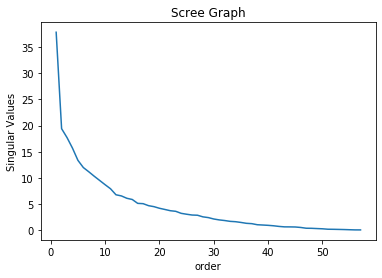

In [36]:
plt.plot(order, s)
plt.title('Scree Graph')
plt.xlabel('order')
plt.ylabel('Singular Values')
fig1 = plt.gcf()

In [37]:
variance = np.zeros_like(s)

In [38]:
for i in range(len(s)):
    variance[i] = s[i]**2

In [39]:
total_variance = 0
for i in range(len(variance)):
    total_variance += variance[i]

##### find the percentage of variance covered by first p singular values (call this pvc)

In [40]:
pvc = np.zeros_like(variance)
for i in range(len(pvc)):
    pvc[i] = variance[i] + pvc[i-1]

In [41]:
for i in range(len(pvc)):
    pvc[i] = pvc[i] / total_variance

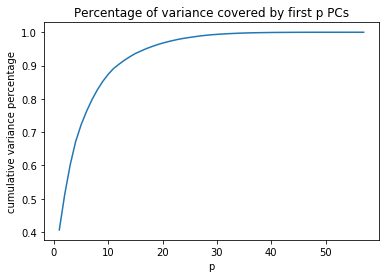

In [42]:
plt.plot(order, pvc)
plt.title('Percentage of variance covered by first p PCs')
plt.xlabel('p')
plt.ylabel('cumulative variance percentage')
fig2 = plt.gcf()

##### from the scree plot and the graph of percentage variance, choose the first 12 principal components, since over 90% of the variance is covered by this selection, and it is near the "elbow" of the scree graph.

In [43]:
v = np.transpose(vh)

In [44]:
delete = np.arange(12,57)
v = np.delete(v, delete, axis=1)

In [45]:
reduced_data = matrix @ v

##### now we have reduced the original data to 12 orthogonal principal components.

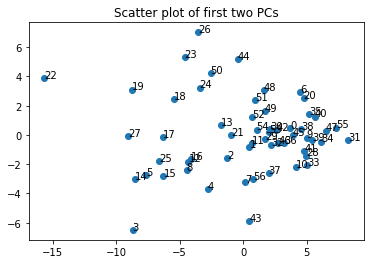

In [46]:
x = reduced_data[:,0] 
y = reduced_data[:,1]
n = np.arange(0, len(x))
fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.title('Scatter plot of first two PCs')
fig3 = plt.gcf()

##### the schools are annotated with their number, as in the first column of the original data

### **now to design and implement a k-means clustering algorithm**

In [47]:
class k_means:
    def __init__(self, data, k):
        self.data = data
        self.k = k
    def fit(self):
        x = self.data
        k = self.k
        axes = len(x[0,:])
        entries = len(x[:,0])
        cluster_nums = np.arange(1, k+1)
        max_iter = 100
        distances = np.zeros(k)
        centroids = np.zeros((k, axes))
        rg = np.zeros(axes)
        clusters = np.zeros(entries)
        old_clust = np.zeros(entries)
        cluster_pts = np.zeros(k)
        con1 = True
        con2 = True
        iters = 0
        dummy = 0
        d = 0
        min_inter = 10000
        max_intra = 0
        dunn = 0
        
        # set each centroid coordinate to be the mean of its respective column
        for i in range(k):
            for j in range(axes):
                centroids[i,j] = np.mean(x[:,j])
                rg[j] = np.max(x[:,j]) - np.min(x[:,j])
        # now loop back through and add random numbers to the centroid coordinates
        for i in range(k):
            for j in range(axes):
                centroids[i,j] = centroids[i,j] + uniform(-rg[j]/2, rg[j]/2)
        # so now, each centroid should be in a random and different location
        
        # start our while loop, as this is where the program will begin learning
        while con1 == True and con2 == True:
            for i in range(len(old_clust)):
                old_clust[i] = clusters[i]
            # now, assign each point to its closest centroid
            for i in range(entries):
                for j in range(k):
                    distances[j] = np.linalg.norm(x[i,:]-centroids[j,:])
                for m in range(k):
                    if distances[m] == np.min(distances):
                        clusters[i] = cluster_nums[m]
            # now, recalculate the centroids of the newly formed clusters
            # first, sum all of the coordinates for each point in a cluster
            # also count the number of points in each cluster
            tmp = np.zeros_like(centroids)
            for m in range(k):
                for i in range(entries):
                    if clusters[i]-1 == m:
                        tmp[m,:] += x[i,:]
                        cluster_pts[m] += 1
            # now divide each sum by its number of points
            for m in range(k):
                centroids[m,:] = tmp[m,:]/cluster_pts[m]
            iters += 1
            # stop the loop if the max number of iterations is reached
            if iters == max_iter:
                con1 = False
            # stop the loop if the cluster assignments have not changed
            for i in range(len(clusters)):
                if old_clust[i] != clusters[i]:
                    dummy += 1
            # reset our counting variables at the end of the loop
            if dummy == 0:
                con2 = False
            else:
                dummy = 0
                for m  in range(k):
                    cluster_pts[m] = 0
        #finally, calculate the dunn index and print it
        for i in range(entries):
            for j in range(entries):
                d = np.linalg.norm(x[i,:]-x[j,:])
                if clusters[i] != clusters[j] and i != j:
                    if d < min_inter:
                        min_inter = d
                if clusters[i] == clusters[j] and i != j:
                    if d > max_intra:
                        max_intra = d
        dunn = min_inter / max_intra
        min_inter = round(min_inter, 3)
        max_intra = round(max_intra, 3)
        dunn = round(dunn, 3)
        print("minimal intercluster distance = " + str(min_inter))
        print("maximum intracluster distance = " + str(max_intra))
        print("dunn index = " + str(dunn))
        print("iterations required for convergence = " + str(iters))
        return clusters

##### **cluster the data that has been reduced to p principal components**

In [259]:
reduced_test = k_means(reduced_data, 3)

In [260]:
red_clusters = reduced_test.fit()

minimal intercluster distance = 3.647
maximum intracluster distance = 17.491
dunn index = 0.209
iterations required for convergence = 5


In [261]:
colorlist = ['b','g','r','c','m','y','tan','lime','pink','silver']
colors = list()
for i in range(len(red_clusters)):
    if red_clusters[i] ==1:
        colors.append(colorlist[1])
    if red_clusters[i] ==2:
        colors.append(colorlist[2])
    if red_clusters[i] ==3:
        colors.append(colorlist[3])
    if red_clusters[i] ==4:
        colors.append(colorlist[4])
    if red_clusters[i] ==5:
        colors.append(colorlist[5])
    if red_clusters[i] ==6:
        colors.append(colorlist[6])
    if red_clusters[i] ==7:
        colors.append(colorlist[7])
    if red_clusters[i] ==8:
        colors.append(colorlist[8])
    if red_clusters[i] ==9:
        colors.append(colorlist[9])
    if red_clusters[i] ==10:
        colors.append(colorlist[10])

##### 3 clusters looks like a good fit, since the dunn index does not get noticeably higher for higher cluster numbers, and the clusters are visually distinct

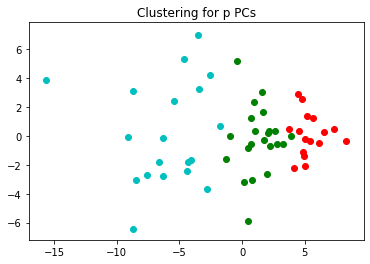

In [262]:
x = reduced_data[:,0] 
y = reduced_data[:,1]
fig, ax = plt.subplots()
for i in range(len(x)):
    plt.scatter(x[i],y[i], c = colors[i])
plt.title('Clustering for p PCs')
fig4 = plt.gcf()

In [204]:
print("colleges clustered with UT:")
for i in range(len(red_clusters)):
    if red_clusters[i] == red_clusters[0] and i != 0:
        print(colleges[i])

colleges clustered with UT:
Clemson Univ.
Auburn Univ.
Iowa State Univ.
Univ. of California - Santa Barbara
Louisiana State Univ. 
Mississippi State Univ.
Univ. of Alabama 
Univ. of Arkansas -
Univ. of Mississippi
Univ. of South Carolina 
Univ. of Oklahoma 
Univ. of Nebraska 
Delaware
Colorado State
U. of Massachusetts
Univ. of Colorado 
Univ. of Oregon 
UC-Riverside


##### **now let's try clustering the original data set**

In [189]:
test = k_means(matrix, 3)

In [190]:
clusters = test.fit()

minimal intercluster distance = 4.484
maximum intracluster distance = 19.195
dunn index = 0.234
iterations required for convergence = 5


In [241]:
colorlist = ['b','g','r','c','m','y','tan','lime','pink','silver']
colors = list()
for i in range(len(clusters)):
    if clusters[i] ==1:
        colors.append(colorlist[1])
    if clusters[i] ==2:
        colors.append(colorlist[2])
    if clusters[i] ==3:
        colors.append(colorlist[3])
    if clusters[i] ==4:
        colors.append(colorlist[4])
    if clusters[i] ==5:
        colors.append(colorlist[5])
    if clusters[i] ==6:
        colors.append(colorlist[6])
    if clusters[i] ==7:
        colors.append(colorlist[7])
    if clusters[i] ==8:
        colors.append(colorlist[8])
    if clusters[i] ==9:
        colors.append(colorlist[9])
    if clusters[i] ==10:
        colors.append(colorlist[10])

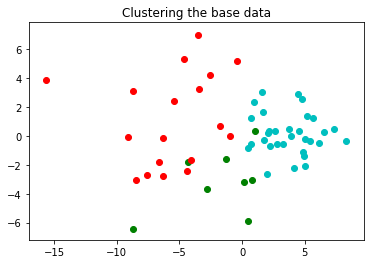

In [242]:
x = reduced_data[:,0] 
y = reduced_data[:,1]
fig, ax = plt.subplots()
for i in range(len(x)):
    plt.scatter(x[i],y[i], c = colors[i])
plt.title('Clustering the base data')
fig5 = plt.gcf()

In [202]:
print("colleges clustered with UT: ")
for i in range(len(clusters)):
    if clusters[i] == clusters[0] and i != 0:
        print(colleges[i])

colleges clustered with UT: 
Univ. of Georgia
Clemson Univ.
Auburn Univ.
Iowa State Univ.
NC State Univ.
Univ. of California - Santa Barbara
Louisiana State Univ. 
Virginia Tech
Univ. of Kentucky
Mississippi State Univ.
Univ. of Missouri 
Univ. of Alabama 
Univ. of Arkansas -
Univ. of Mississippi
Univ. of South Carolina 
Florida State Univ. 
Univ. of Oklahoma 
Univ. of Nebraska 
Delaware
Colorado State
Univ. of Kansas 
U. of Massachusetts
Univ. of Colorado 
Univ. of Oregon 
SUNY - Stony Brook
UC-Irvine
Connecticut
 Iowa
Buffalo
UC-Riverside


##### **lastly, cluster based on only the first 2 PCs**

In [215]:
two_pc_data = np.zeros((57,2))
two_pc_data[:,0] = reduced_data[:,0]
two_pc_data[:,1] = reduced_data[:,1]

In [227]:
two_pc_test = k_means(two_pc_data, 3)

In [228]:
two_pc_clusters = two_pc_test.fit()

minimal intercluster distance = 0.458
maximum intracluster distance = 14.434
dunn index = 0.032
iterations required for convergence = 6


In [243]:
colorlist = ['b','g','r','c','m','y','tan','lime','pink','silver']
colors = list()
for i in range(len(clusters)):
    if two_pc_clusters[i] ==1:
        colors.append(colorlist[1])
    if two_pc_clusters[i] ==2:
        colors.append(colorlist[2])
    if two_pc_clusters[i] ==3:
        colors.append(colorlist[3])
    if two_pc_clusters[i] ==4:
        colors.append(colorlist[4])
    if two_pc_clusters[i] ==5:
        colors.append(colorlist[5])
    if two_pc_clusters[i] ==6:
        colors.append(colorlist[6])
    if two_pc_clusters[i] ==7:
        colors.append(colorlist[7])
    if two_pc_clusters[i] ==8:
        colors.append(colorlist[8])
    if two_pc_clusters[i] ==9:
        colors.append(colorlist[9])
    if two_pc_clusters[i] ==10:
        colors.append(colorlist[10])

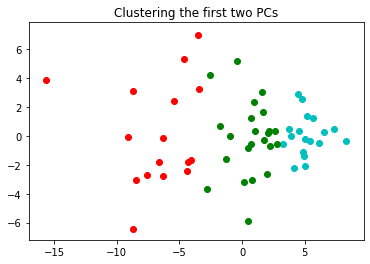

In [244]:
x = reduced_data[:,0] 
y = reduced_data[:,1]
fig, ax = plt.subplots()
for i in range(len(x)):
    plt.scatter(x[i],y[i], c = colors[i])
plt.title('Clustering the first two PCs')
fig6 = plt.gcf()

In [233]:
print("colleges clustered with UT: ")
for i in range(len(two_pc_clusters)):
    if two_pc_clusters[i] == two_pc_clusters[0] and i != 0:
        print(colleges[i])

colleges clustered with UT: 
Clemson Univ.
Auburn Univ.
Iowa State Univ.
Univ. of California - Santa Barbara
Louisiana State Univ. 
Mississippi State Univ.
Univ. of Alabama 
Univ. of Arkansas -
Univ. of Mississippi
Univ. of South Carolina 
Univ. of Oklahoma 
Univ. of Nebraska 
Delaware
Colorado State
U. of Massachusetts
Univ. of Oregon 
UC-Riverside


##### save plots as png